In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")

### *Load Data and Basic Info*

In [2]:
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.shape

(545, 13)

In [4]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [6]:
data.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
250,4515000,3510,3,1,3,yes,no,no,no,no,0,no,semi-furnished
355,3773000,8250,3,1,1,yes,no,no,no,no,2,no,furnished
225,4753000,6440,2,1,1,yes,no,no,no,yes,3,no,semi-furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
265,4403000,2880,3,1,2,yes,no,no,no,no,0,yes,semi-furnished


### *Basic Information and Summary*

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


### *Unique Data Identification*

In [10]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [11]:
data["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [12]:
data["parking"].unique()

array([2, 3, 0, 1], dtype=int64)

In [13]:
data["bedrooms"].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

### *Missing Data*

In [14]:
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool

In [15]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### *Duplicate*

In [16]:
data.duplicated().sum()

0

In [17]:
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [18]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### *set_index() and reset_index()*

In [19]:
data.set_index("price",inplace=True)

In [20]:
data.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,,,,,,,,,,,,
13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
data.reset_index(inplace=True)

In [22]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### *GroupBy()*

In [23]:
group_data=data.groupby("stories")

In [24]:
group_data.get_group(4)[:3]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [25]:
group_data.get_group(4).min()

price                 4550000
area                     4500
bedrooms                    2
bathrooms                   1
stories                     4
mainroad                  yes
guestroom                  no
basement                   no
hotwaterheating            no
airconditioning            no
parking                     0
prefarea                   no
furnishingstatus    furnished
dtype: object

### *Data Transformation*

In [26]:
#data['mainroad'] = data['mainroad'].replace({'yes': 1, 'no': 0})
#data['guestroom'] = data['guestroom'].replace({'yes': 1, 'no': 0})
#data['basement'] = data['basement'].replace({'yes': 1, 'no': 0})
#data['hotwaterheating'] = data['hotwaterheating'].replace({'yes': 1, 'no': 0})
#data['airconditioning'] = data['airconditioning'].replace({'yes': 1, 'no': 0})
#data['prefarea'] = data['prefarea'].replace({'yes': 1, 'no': 0})

In [27]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### *Basic Plots*

#### *a)Line Plot*

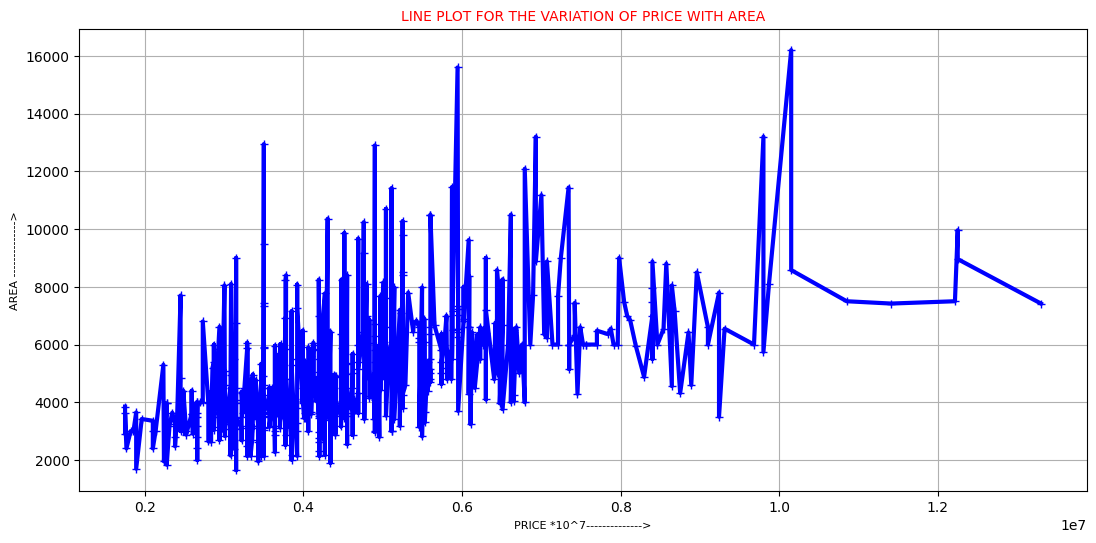

In [29]:
plt.figure(figsize=(13,6))
plt.plot(data["price"],data['area'],marker='+',ls='-',lw=3,color='b')
plt.title("LINE PLOT FOR THE VARIATION OF PRICE WITH AREA",color='r',fontsize=10)
plt.xlabel("PRICE *10^7-------------->",fontsize=8)
plt.ylabel("AREA -------------->",fontsize=8)
plt.grid()
plt.show()

#### *b)Bar Plot*

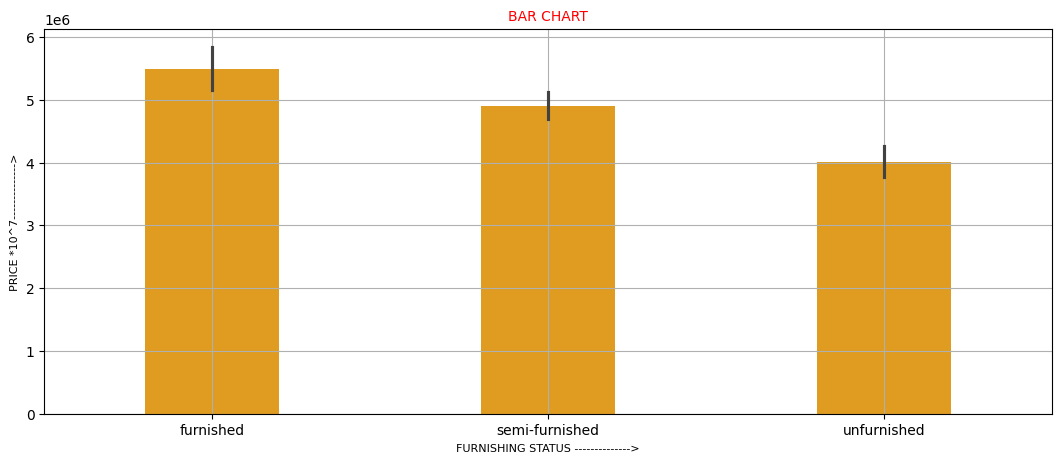

In [30]:
plt.figure(figsize=(13,5))
sns.barplot(x='furnishingstatus', y='price', data=data,color="orange",width=0.4)
plt.title("BAR CHART",color='red',fontsize=10)
plt.xlabel("FURNISHING STATUS -------------->",fontsize=8)
plt.ylabel("PRICE *10^7-------------->",fontsize=8)
plt.grid()
plt.show()

#### *c)Scatter Plot*

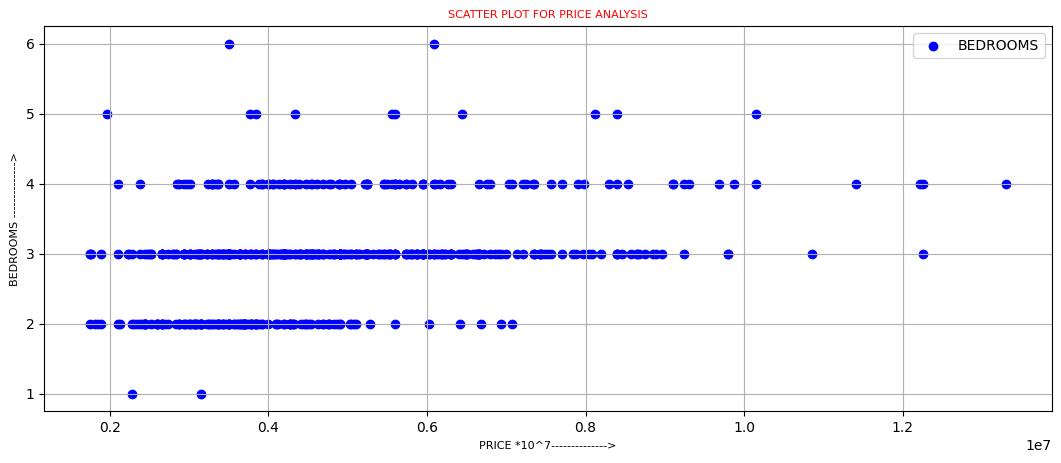

In [31]:
plt.figure(figsize=(13,5))
x=data['price']
y1=data['bedrooms']
plt.scatter(x,y1,color='b',marker='o',label='BEDROOMS')
plt.title("SCATTER PLOT FOR PRICE ANALYSIS",color="r",fontsize=8)
plt.xlabel("PRICE *10^7-------------->",fontsize=8)
plt.ylabel("BEDROOMS -------------->",fontsize=8)
plt.legend()
plt.grid()
plt.show()

#### *d)Histogram*

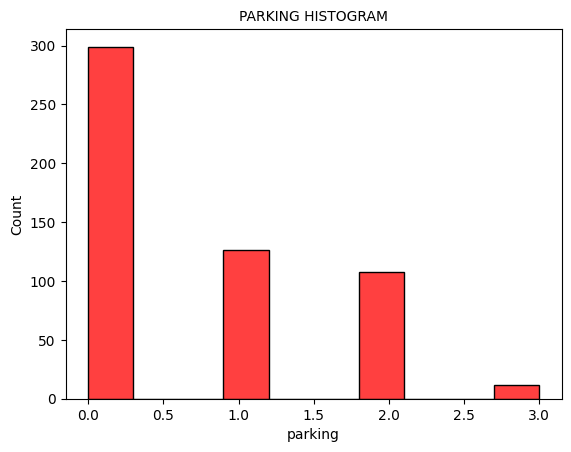

In [32]:
sns.histplot(data["parking"],bins=10,color='r')
plt.title("PARKING HISTOGRAM",fontsize=10)
plt.show()

#### *e)KDE [Kernel Density Estimate] Plot*

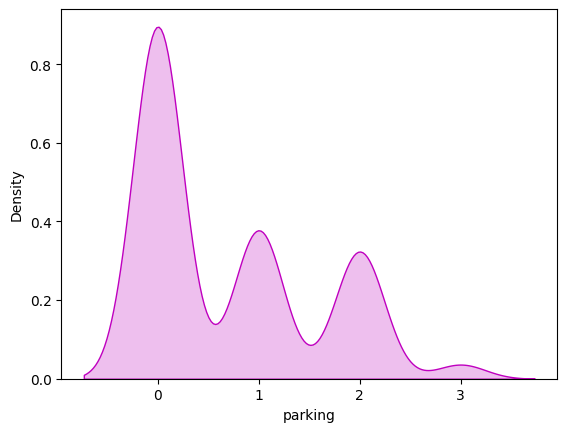

In [46]:
sns.kdeplot(data["parking"],fill=True,color="m")
plt.show()

#### *f)Distribution Plot*

In [39]:
d=data.select_dtypes(exclude='object')
d

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


price


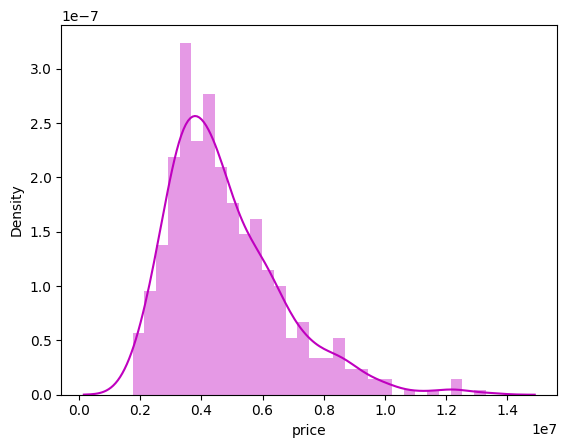

area


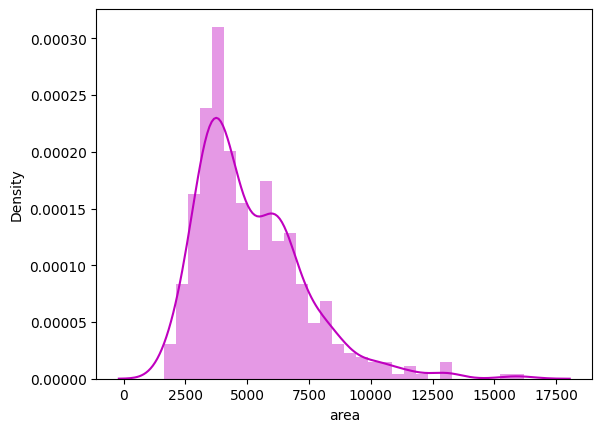

bedrooms


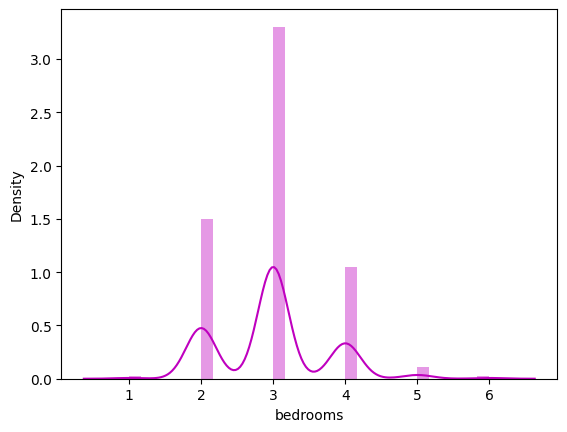

bathrooms


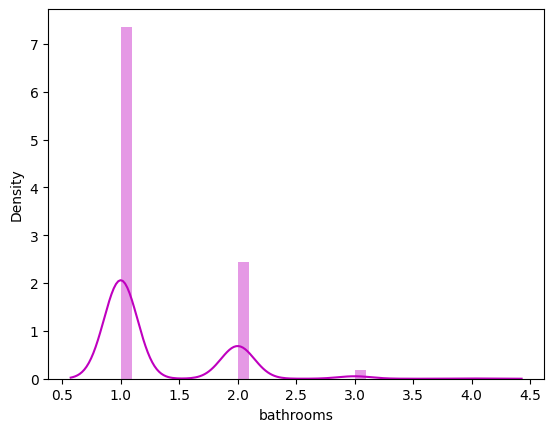

stories


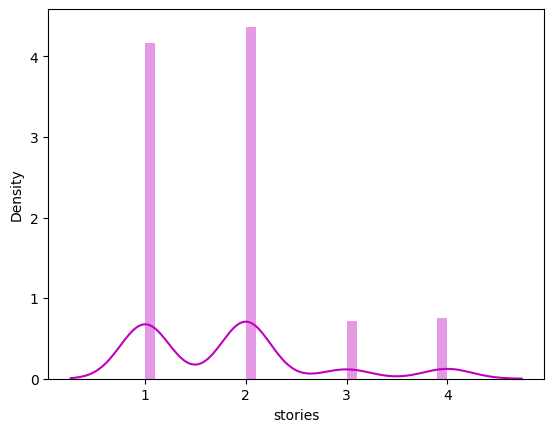

parking


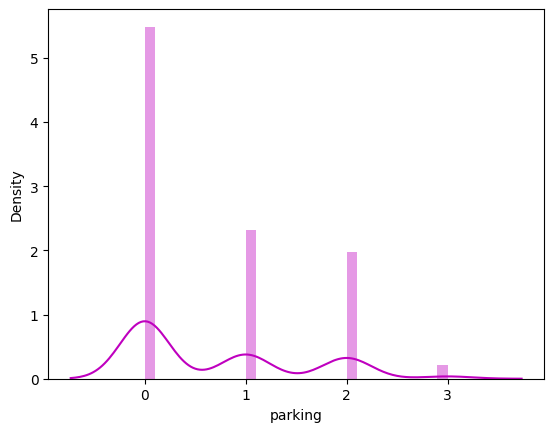

In [40]:
for i in d.columns:
    print(i)
    sns.distplot(d[i],color='m',bins=30)
    plt.show()

### *Outlier Detection*

#### *a)Box Plot*

price


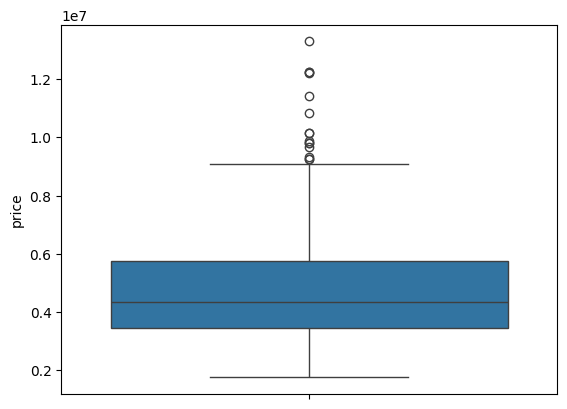

area


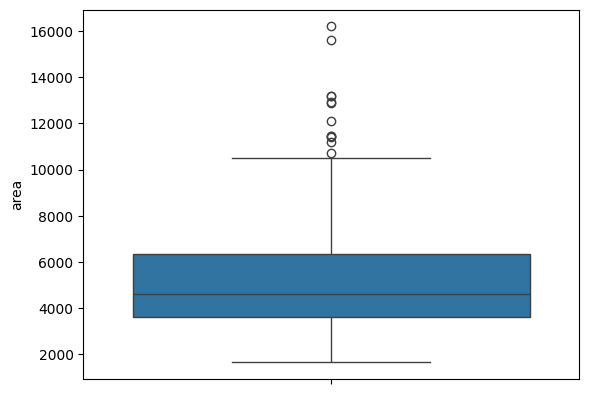

bedrooms


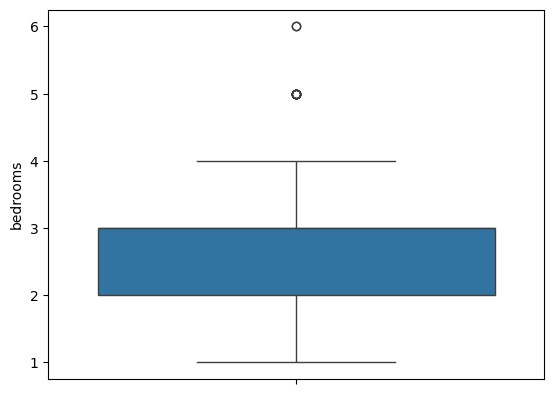

bathrooms


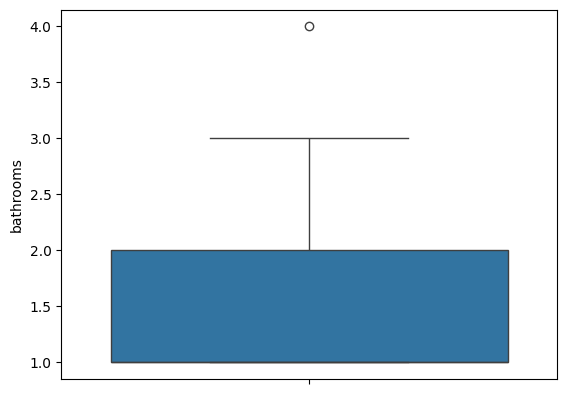

stories


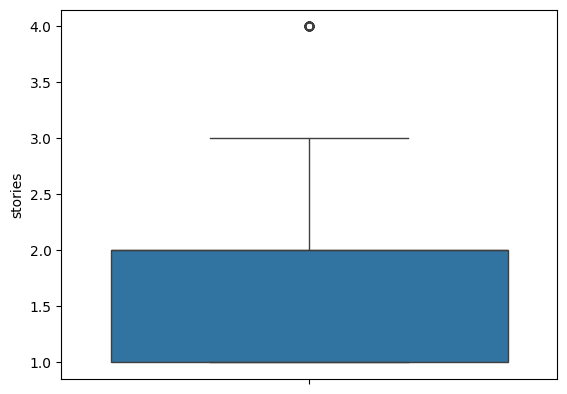

parking


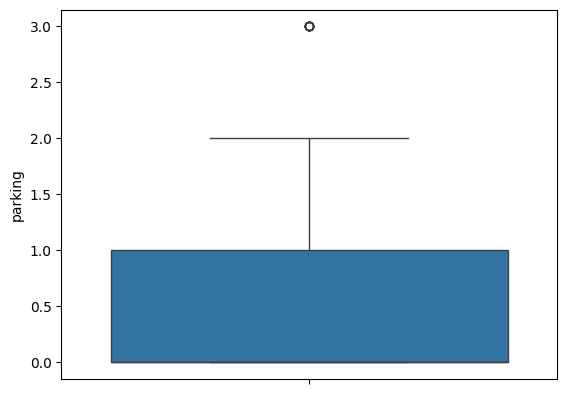

In [41]:
for i in d.columns:
    print(i)
    sns.boxplot(d[i])
    plt.show()

#### *b)IQR (Interquartile Range)*

In [42]:
Q1=d.quantile(0.25)
Q3=d.quantile(0.75)
IQR=Q3-Q1
print(f"IQR: \n {IQR}")

IQR: 
 price        2310000.0
area            2760.0
bedrooms           1.0
bathrooms          1.0
stories            1.0
parking            1.0
dtype: float64


In [43]:
#Define Upper and Lower bound for Outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(f"Lower bound for outliers: \n \n{lower_bound}\n \n")
print(f"Upper bound for outliers: \n \n {upper_bound}")

Lower bound for outliers: 
 
price       -35000.0
area          -540.0
bedrooms         0.5
bathrooms       -0.5
stories         -0.5
parking         -1.5
dtype: float64
 

Upper bound for outliers: 
 
 price        9205000.0
area           10500.0
bedrooms           4.5
bathrooms          3.5
stories            3.5
parking            2.5
dtype: float64


In [52]:
d=d[~((d<lower_bound)|(d>upper_bound)).any(axis=1)]
d

,price,area,bedrooms,bathrooms,stories,parking
15,9100000,6000,4,1,2,2
16,9100000,6600,4,2,2,1
18,8890000,4600,3,2,2,2
19,8855000,6420,3,2,2,1
20,8750000,4320,3,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


### *Correlation & Heatmap*

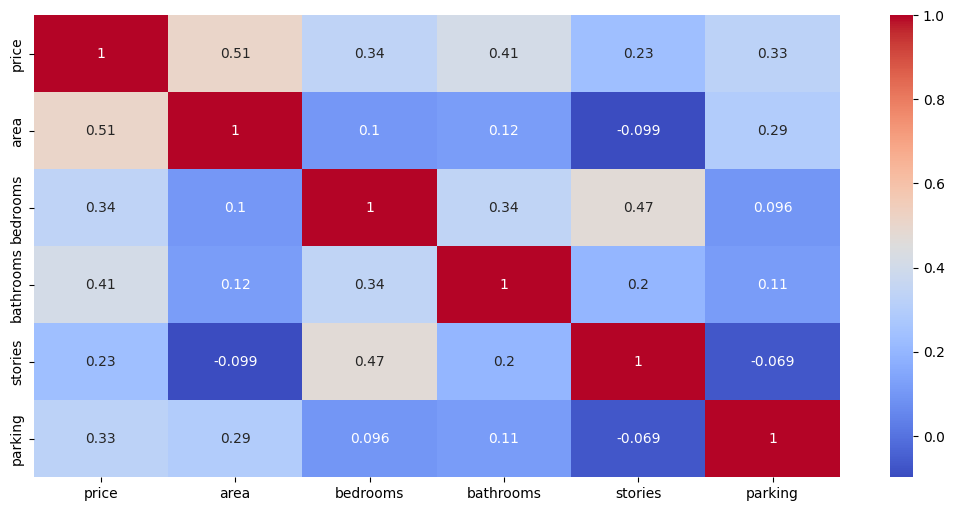

In [45]:
plt.figure(figsize=(13,6))
sns.heatmap(d.corr(),annot=True,cmap='coolwarm',)
plt.show()

In [54]:
d.to_csv("cleaned_housing_data.csv", index=False)  